Worked on by: Iljas

Clean the data

This is very important on both datasets as you don't control the field-names yourself.

    Rename columns to remove spaces from the name and make them all lowercase.
    Look for the Na-values. Fix them if possible, using a couple of techniques before deciding which is best.
    Look for the Outliers. Fix them if needed, using a couple of techniques before deciding which is best.
    Look for (ordered) categoricals and label them as such.

Exploratory data analysis

    Show the outliers and try to explain them.
    Draw some graphs about features you find interesting.
    Look for correlations in your data.

Repeat

Both phases (cleaning and exploring) aren't two different steps in a process, but rather one large fuzzy mess of code. Something like:

    I'll give all the Na's the mean value.
    My graphs look strange, what is this peak doing at the mean?
    Is there a correlation between the value that has a lot of Na's and another column?
    Let's use the other column to fill in the Na's!

In the upcoming steps of this project you'll put all the really good code together to make one final import, but for now poke the data and see what happens.
Final loading and preparing

Once you've cleaning and exploring and cleaning and exploring you'll lose track of the necessary steps and the optional steps. It's also possible that you did some cleaning that wasn't needed (e.g predict a field that should have been left empty).

So end up your cleaning by creating a notebook that contains all the code to go from rough data to prepared data without any of the graphs.

This has to be done for all both datasets.

# Clean

### Import

In [27]:
%pip install pandas
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import csv
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

### Clean columns

In [37]:
input_file = "price_paid_records.csv"

df = pd.read_csv(
    input_file,
    parse_dates = ["Date of Transfer"]
)

df["Price"] = (
    df["Price"]
    .astype(float)
)

df.columns = (
    df.columns
    .str.lower()
    .str.replace(" -", "")
    .str.replace("/", "_or_")
    .str.replace(" ", "_")
)

df["property_type"] = df["property_type"].replace({
    "D": "Detached",
    "S": "Semi-Detached",
    "T": "Terraced",
    "F": "Flats/Maisonettes",
    "O": "Other"
})

df["old_or_new"] = df["old_or_new"].replace({
    "Y": "New",
    "N": "Established",
})

df["duration"] = df["duration"].replace({
    "F": "Freehold",
    "L": "Leasehold",
})

df["ppdcategory_type"] = df["ppdcategory_type"].replace({
    "A": "StandardPrice",
    "B": "AdditionalPrice",
})

df["record_status_monthly_file_only"] = df["record_status_monthly_file_only"].replace({
    "A": "Addition",
    "C": "Change",
    "D": "Delete",
})

df
# full file: 1m4s

,transaction_unique_identifier,price,date_of_transfer,property_type,old_or_new,duration,town_or_city,district,county,ppdcategory_type,record_status_monthly_file_only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000.0,1995-08-18,Terraced,Established,Freehold,OLDHAM,OLDHAM,GREATER MANCHESTER,StandardPrice,Addition
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500.0,1995-08-09,Semi-Detached,Established,Freehold,GRAYS,THURROCK,THURROCK,StandardPrice,Addition
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000.0,1995-06-30,Terraced,Established,Freehold,HIGHBRIDGE,SEDGEMOOR,SOMERSET,StandardPrice,Addition
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150.0,1995-11-24,Terraced,Established,Freehold,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,StandardPrice,Addition
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899.0,1995-06-23,Semi-Detached,Established,Freehold,WAKEFIELD,LEEDS,WEST YORKSHIRE,StandardPrice,Addition
...,...,...,...,...,...,...,...,...,...,...,...
22489343,{4C4EE000-291A-1854-E050-A8C063054F34},175000.0,2017-02-20,Semi-Detached,Established,Freehold,LEEDS,LEEDS,WEST YORKSHIRE,StandardPrice,Addition
22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945.0,2017-02-15,Detached,Established,Freehold,WETHERBY,LEEDS,WEST YORKSHIRE,StandardPrice,Addition
22489345,{4C4EE000-291C-1854-E050-A8C063054F34},274000.0,2017-02-24,Detached,Established,Leasehold,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,StandardPrice,Addition
22489346,{4C4EE000-291D-1854-E050-A8C063054F34},36000.0,2017-02-22,Terraced,Established,Freehold,HALIFAX,CALDERDALE,WEST YORKSHIRE,StandardPrice,Addition


# Exploration

In [38]:
print(f"amount na values:\n{df.isna().sum()}")

amount na values:
transaction_unique_identifier      0
price                              0
date_of_transfer                   0
property_type                      0
old_or_new                         0
duration                           0
town_or_city                       0
district                           0
county                             0
ppdcategory_type                   0
record_status_monthly_file_only    0
dtype: int64


In [25]:
print(f"Unique values per column:\n{df.nunique()}")
print()
print(f"All unique values of some columns:")
print(f"property_type: {df['property_type'].unique()}")
print(f"old_or_new: {df['old_or_new'].unique()}")
print(f"duration: {df['duration'].unique()}")
print(f"ppdcategory_type: {df['ppdcategory_type'].unique()}")
print(f"record_status_monthly_file_only: {df['record_status_monthly_file_only'].unique()}")
# full file: 28s

Unique values per column:
transaction_unique_identifier      22489348
price                                172773
date_of_transfer                       8212
property_type                             5
old_or_new                                2
duration                                  3
town_or_city                           1170
district                                454
county                                  127
ppdcategory_type                          2
record_status_monthly_file_only           1
price                                172773
dtype: int64

All unique values of some columns:
property_type: ['Terraced' 'Semi-Detached' 'Detached' 'Flats/Maisonettes' 'Other']
old_or_new: ['Established' 'New']
duration: ['Freehold' 'Leasehold' 'U']
ppdcategory_type: ['StandardPrice' 'AdditionalPrice']
record_status_monthly_file_only: ['Addition']


# Remove unneeded columns

transaction_unique_identifier - primary key, not needed</br>
record_status_monthly_file_only - only has 1 unique value in data

In [39]:
df = df.drop(columns=["transaction_unique_identifier", "record_status_monthly_file_only"])

# Exploration

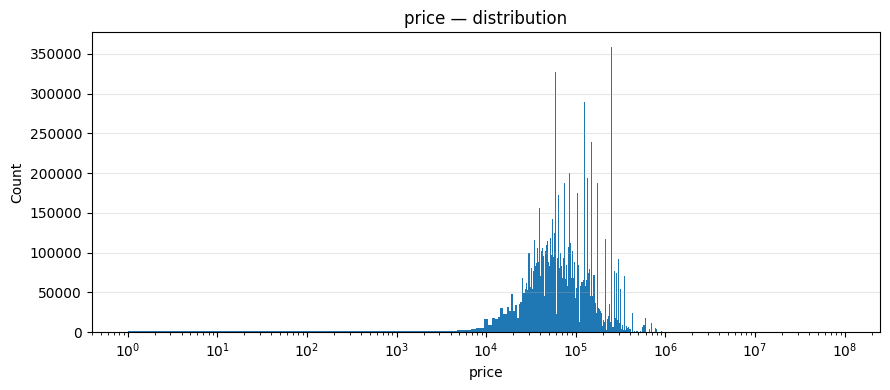

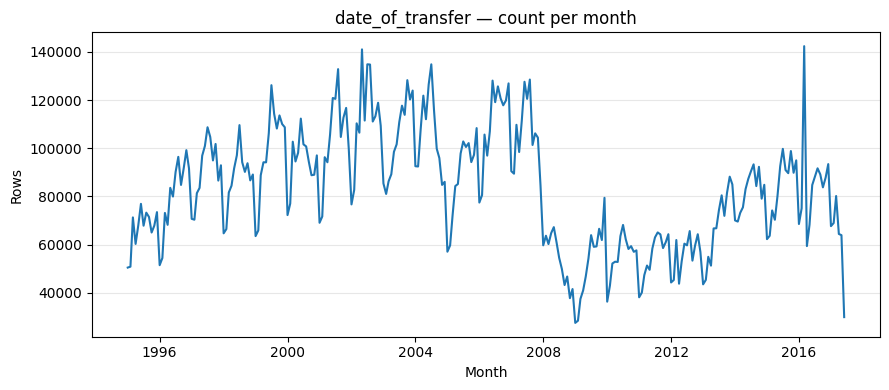

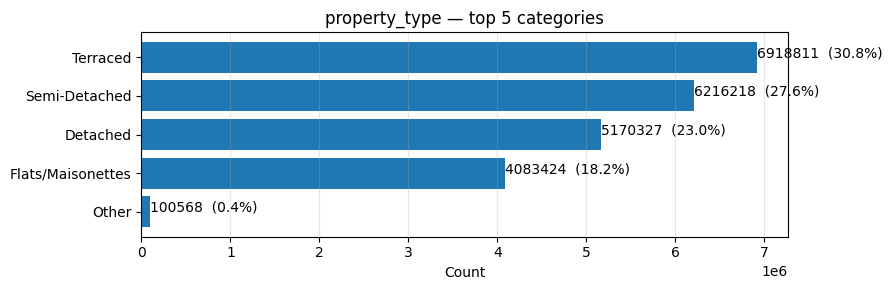

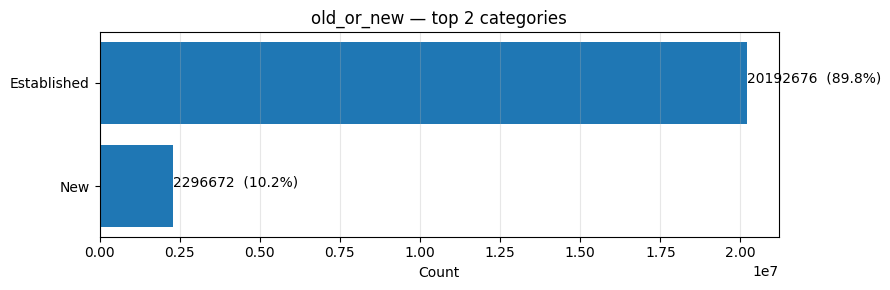

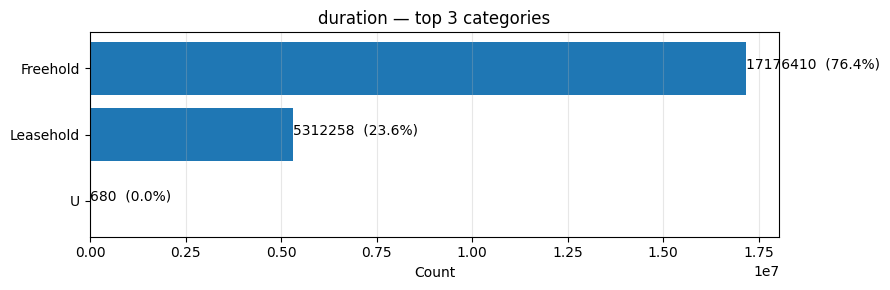

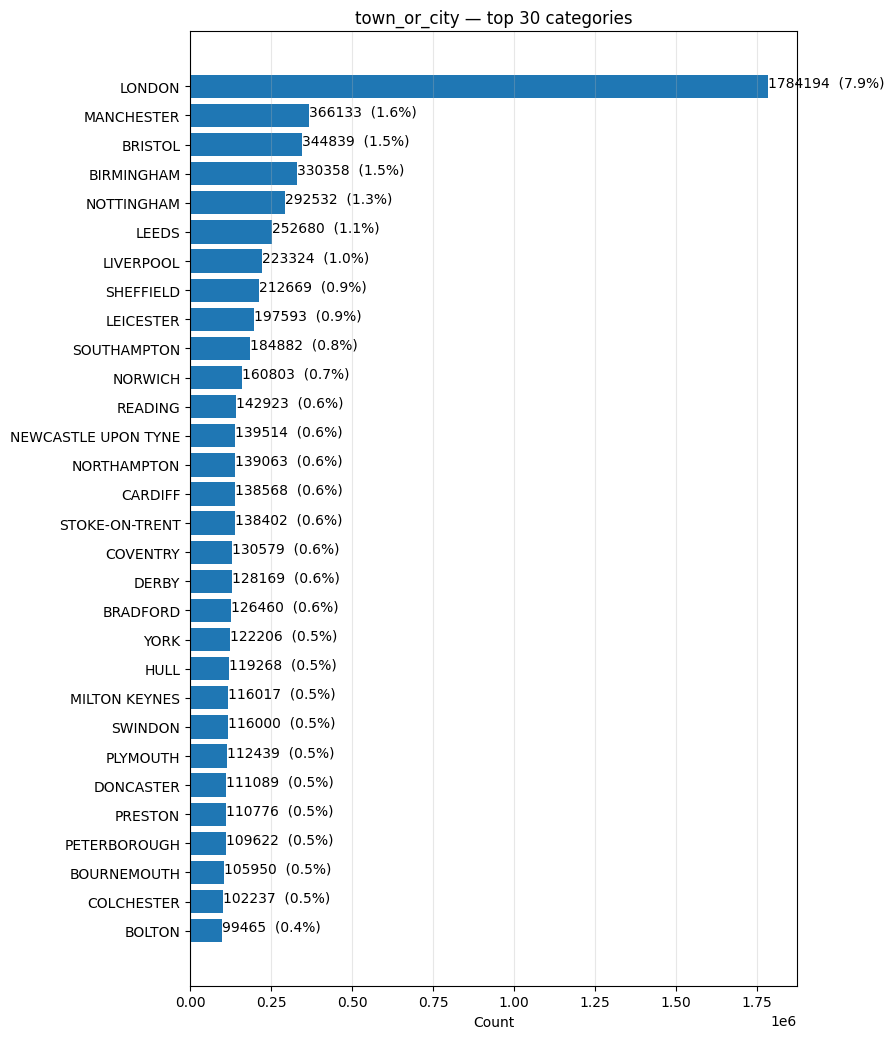

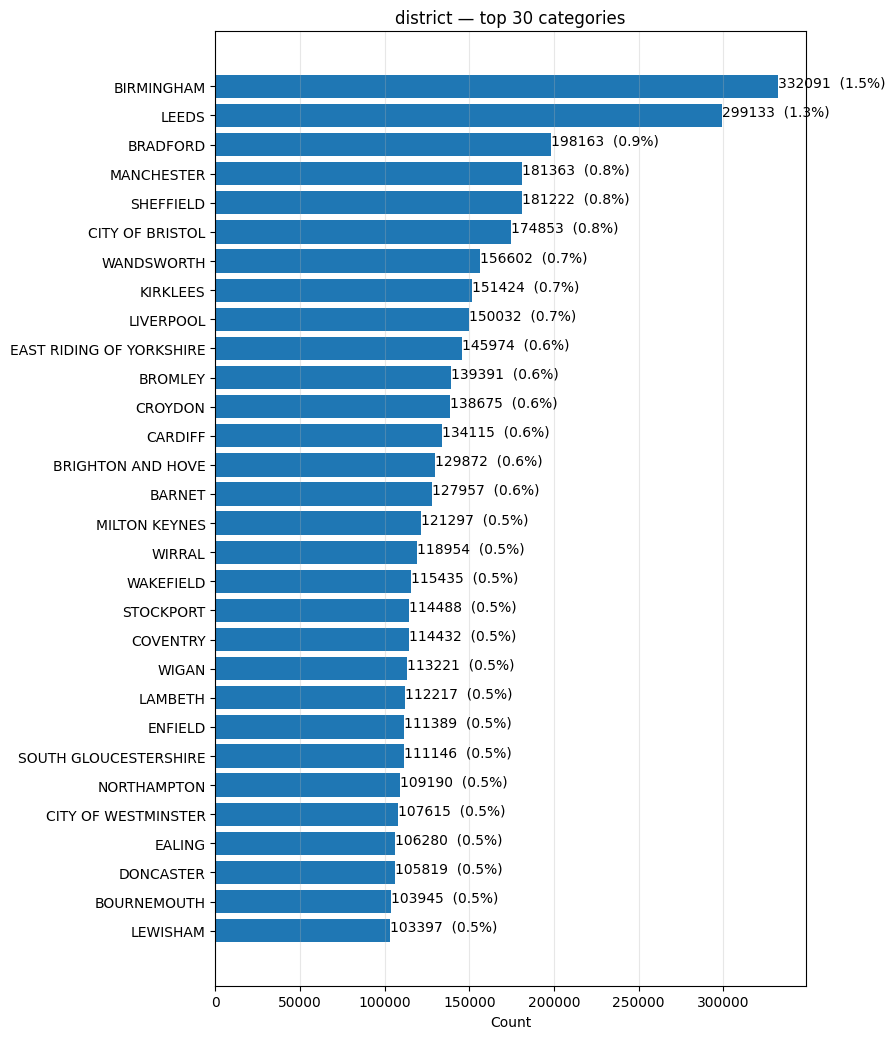

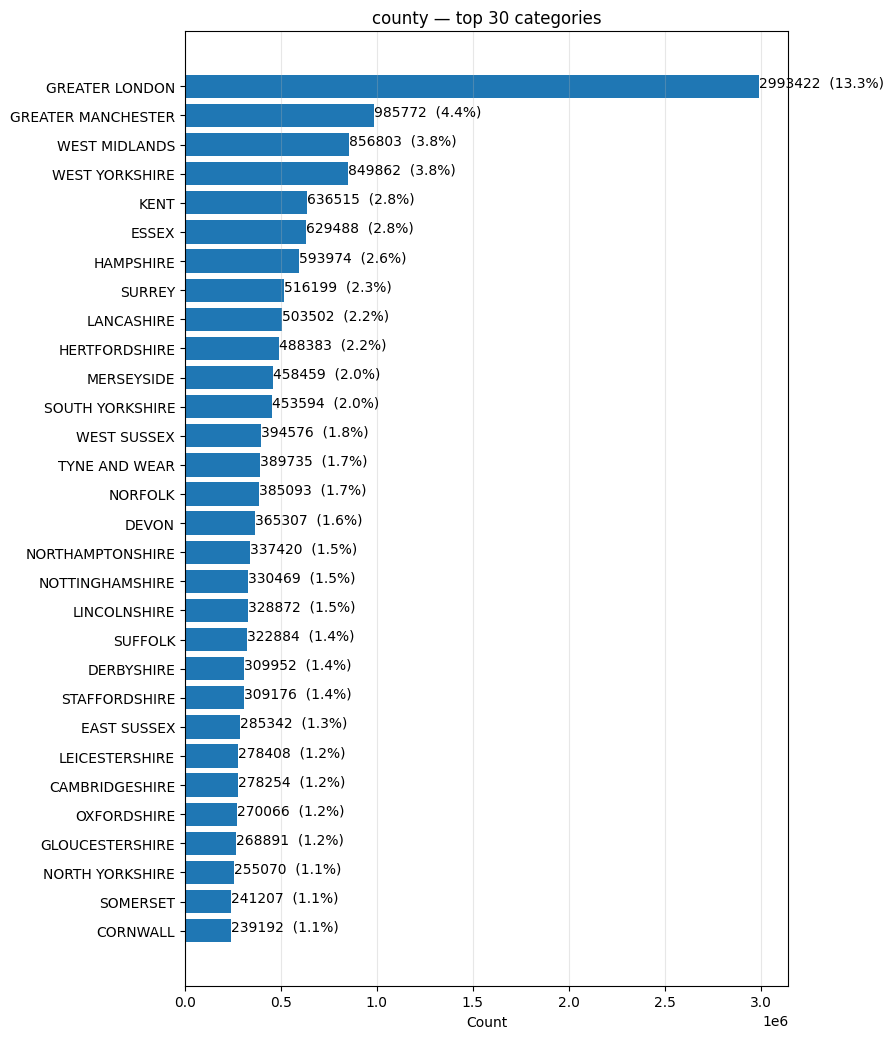

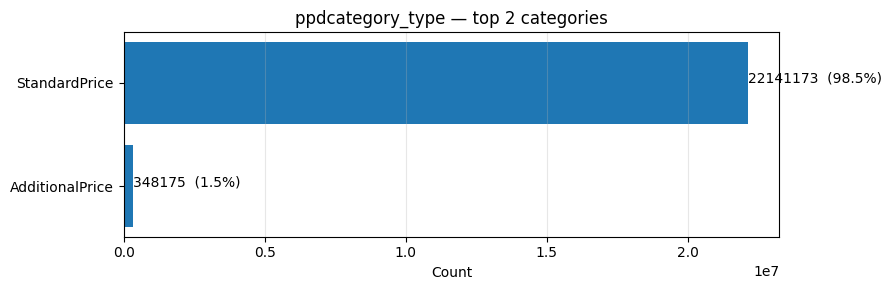

In [48]:
numerical_columns = ["price"]
label_columns = ["property_type", "old_or_new", "duration", "town_or_city", "district", "county", "ppdcategory_type"]
date_columns = ["date_of_transfer"]

TOP_N = 30
HIST_BINS = "auto"

def plot_numeric(col):
    s = pd.to_numeric(df[col], errors="coerce").dropna()
    plt.figure(figsize=(9, 4))
    plt.hist(s.values, bins=HIST_BINS)
    plt.title(f"{col} — distribution")
    plt.xscale("log")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True, axis="y", alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_categorical(col):
    s = df[col].astype("string")
    vc = s.value_counts(dropna=False).head(TOP_N)

    total = len(s)

    labels = [str(x) for x in vc.index]
    y = np.arange(len(vc))

    plt.figure(figsize=(9, max(3, 0.35 * len(vc))))
    bars = plt.barh(y, vc.values)
    plt.yticks(y, labels)
    plt.gca().invert_yaxis()  # show most frequent at top
    plt.title(f"{col} — top {len(vc)} categories")
    plt.xlabel("Count")
    plt.grid(True, axis="x", alpha=0.3)

    # === Add value labels next to the bars ===
    for bar, value in zip(bars, vc.values):
        width = bar.get_width()
        pct = 100 * value / total
        label = f"{value}  ({pct:.1f}%)"

        plt.text(
            width,
            bar.get_y() + bar.get_height() / 2,
            label,
        )

    plt.tight_layout()
    plt.show()

def plot_date(col):
    s = pd.to_datetime(df[col], errors="coerce").dropna()
    if s.empty:
        return

    # Counts per month
    per_month = s.dt.to_period("M").value_counts().sort_index()
    x = per_month.index.to_timestamp()
    y = per_month.values

    plt.figure(figsize=(9, 4))
    plt.plot(x, y)
    plt.title(f"{col} — count per month")
    plt.xlabel("Month")
    plt.ylabel("Rows")
    plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

for column in df.columns:
    if column in numerical_columns:
        plot_numeric(column)
    elif column in label_columns:
        plot_categorical(column)
    elif column in date_columns:
        plot_date(column)

#Extra price with ymax
# plot_numeric("price", 100)

# Full file: 1m45s

# Encode labels

In [50]:
def encode_df(df_in):
    df_out = df_in.copy()

    # Only dummy-encode columns that are actually present
    dummy_cols = ['property_type', 'old_or_new', 'duration', 'ppdcategory_type']
    dummy_cols = [c for c in dummy_cols if c in df_out.columns]

    if dummy_cols:  # avoid calling with empty list
        df_out = pd.get_dummies(df_out, columns=dummy_cols)

    embed_cols = ['town_or_city', 'district', 'county']
    encoders = {}
    embedding_sizes = {}

    for col in embed_cols:
        if col not in df_out.columns:
            continue  # skip missing columns

        encoder = LabelEncoder()
        df_out[col] = encoder.fit_transform(df_out[col].astype(str))
        encoders[col] = encoder

        num_unique = df_out[col].nunique()
        embedding_dim = min(50, (num_unique + 1) // 2)
        embedding_sizes[col] = (num_unique, embedding_dim)

    return df_out

df_encoded = encode_df(df)
df_encoded
# Full file: 22.6s

,price,date_of_transfer,town_or_city,district,county,property_type_Detached,property_type_Flats/Maisonettes,property_type_Other,property_type_Semi-Detached,property_type_Terraced,old_or_new_Established,old_or_new_New,duration_Freehold,duration_Leasehold,duration_U,ppdcategory_type_AdditionalPrice,ppdcategory_type_StandardPrice
0,25000.0,1995-08-18,748,279,47,False,False,False,False,True,True,False,True,False,False,False,True
1,42500.0,1995-08-09,421,397,109,False,False,False,True,False,True,False,True,False,False,False,True
2,45000.0,1995-06-30,479,327,94,False,False,False,False,True,True,False,True,False,False,False,True
3,43150.0,1995-11-24,84,255,3,False,False,False,False,True,True,False,True,False,False,False,True
4,18899.0,1995-06-23,1064,212,119,False,False,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22489343,175000.0,2017-02-20,560,212,119,False,False,False,True,False,True,False,True,False,False,False,True
22489344,586945.0,2017-02-15,1111,212,119,True,False,False,False,False,True,False,True,False,False,False,True
22489345,274000.0,2017-02-24,504,207,119,True,False,False,False,False,True,False,False,True,False,False,True
22489346,36000.0,2017-02-22,434,58,119,False,False,False,False,True,True,False,True,False,False,False,True


# Exploration

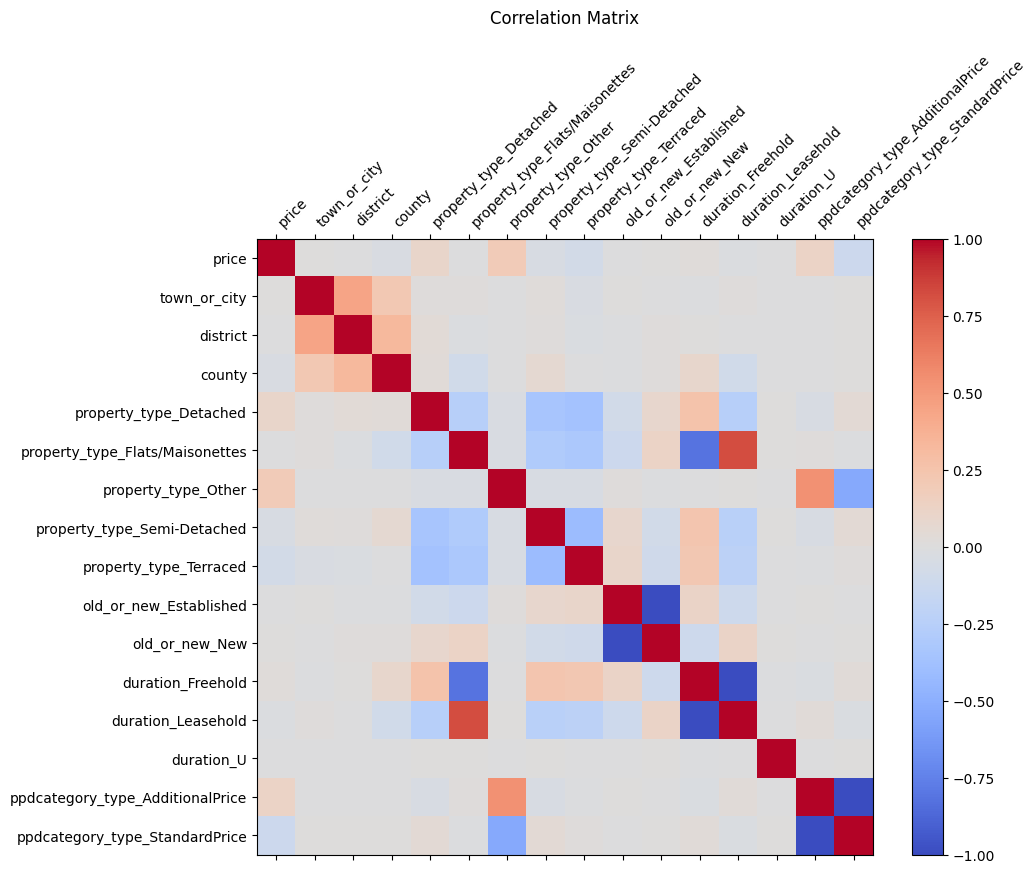

In [51]:
corr = df_encoded.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap="coolwarm")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="left")
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)
plt.title("Correlation Matrix", pad=20)
plt.show()
# Full file 15s

# Deleting more columns

In column property type, there can be the value "other". This only happens 0.4% of the time, and only has a significant correlation with ppdcategory type 'additional price'. ppd category 'additional price' only happens 1.5% of the time, and has no significant correlation. In ppdcategory type, there can only be 2 types.

Duration U almost never happens, so this can be removed.

Because of this, the column ppdcategory will be fully deleted, all records with property type 'other' will be deleted, and all records with duration 'u' will be deleted.

In [ ]:
df = df.drop(columns=["ppdcategory_type"])
df = df[df["property_type"].astype(str) != "Other"]
df = df[df["duration"].astype(str) != "U"]
df
# Full file 7s

,price,date_of_transfer,property_type,old_or_new,duration,town_or_city,district,county
0,25000.0,1995-08-18,Terraced,Established,Freehold,OLDHAM,OLDHAM,GREATER MANCHESTER
1,42500.0,1995-08-09,Semi-Detached,Established,Freehold,GRAYS,THURROCK,THURROCK
2,45000.0,1995-06-30,Terraced,Established,Freehold,HIGHBRIDGE,SEDGEMOOR,SOMERSET
3,43150.0,1995-11-24,Terraced,Established,Freehold,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE
4,18899.0,1995-06-23,Semi-Detached,Established,Freehold,WAKEFIELD,LEEDS,WEST YORKSHIRE
...,...,...,...,...,...,...,...,...
22489343,175000.0,2017-02-20,Semi-Detached,Established,Freehold,LEEDS,LEEDS,WEST YORKSHIRE
22489344,586945.0,2017-02-15,Detached,Established,Freehold,WETHERBY,LEEDS,WEST YORKSHIRE
22489345,274000.0,2017-02-24,Detached,Established,Leasehold,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE
22489346,36000.0,2017-02-22,Terraced,Established,Freehold,HALIFAX,CALDERDALE,WEST YORKSHIRE


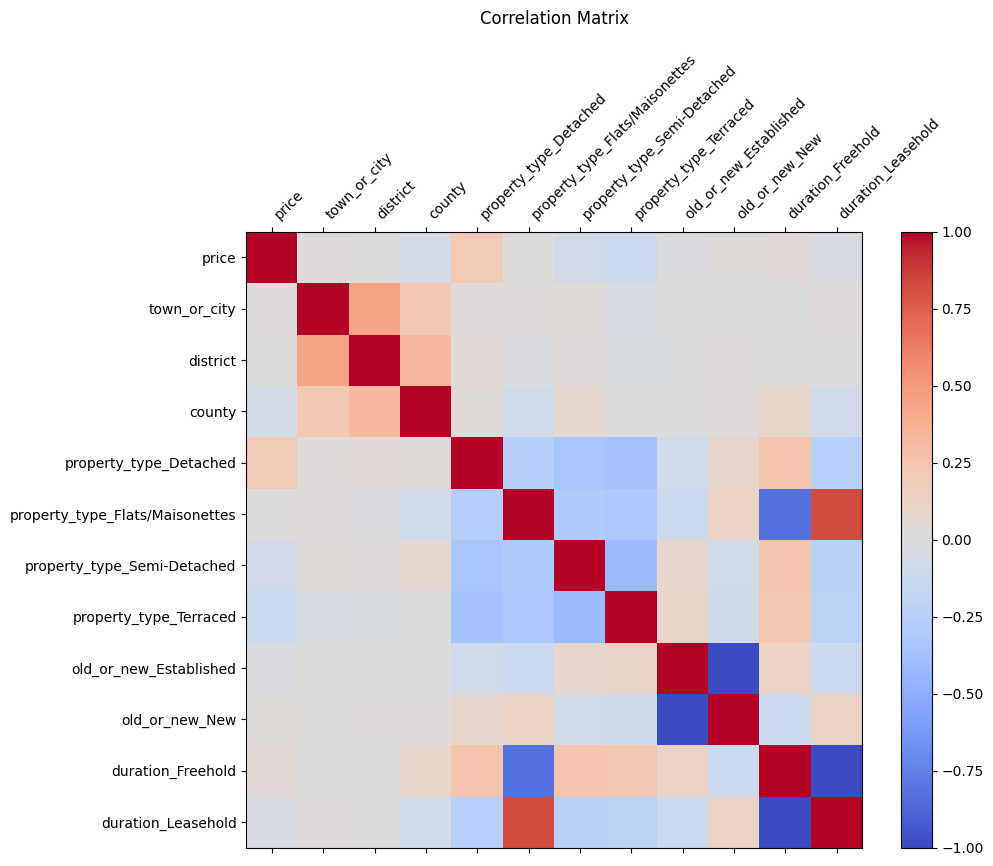

In [ ]:
df_encoded = encode_df(df)
corr = df_encoded.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap="coolwarm")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="left")
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)
plt.title("Correlation Matrix", pad=20)
plt.show()
# Full file 27s

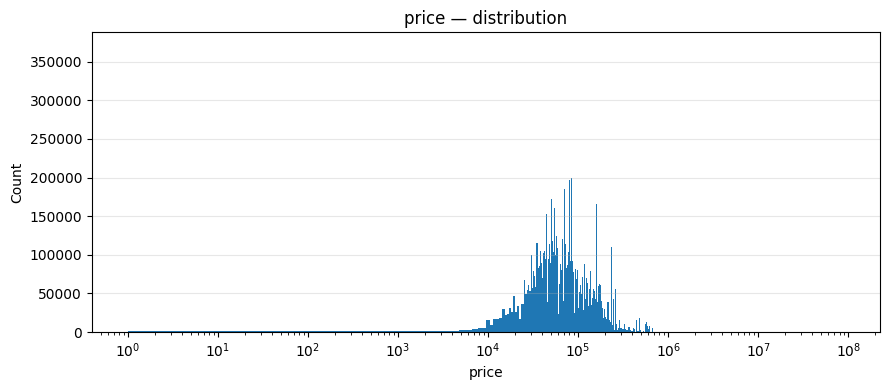

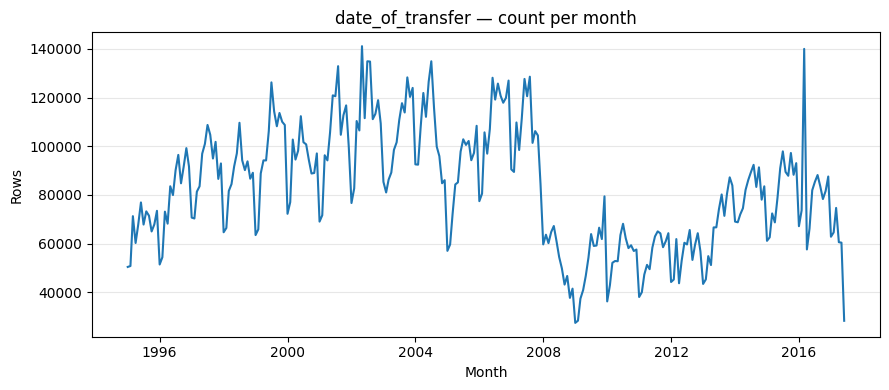

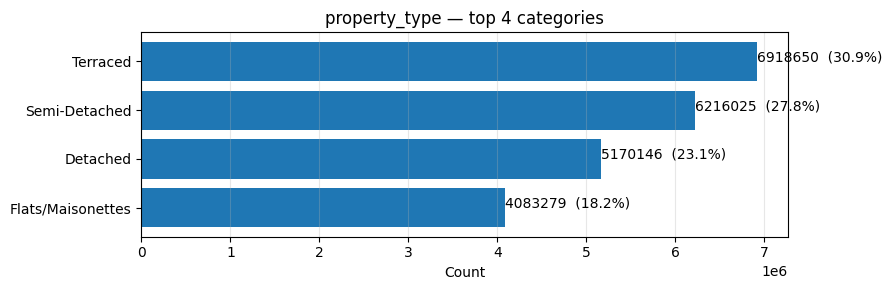

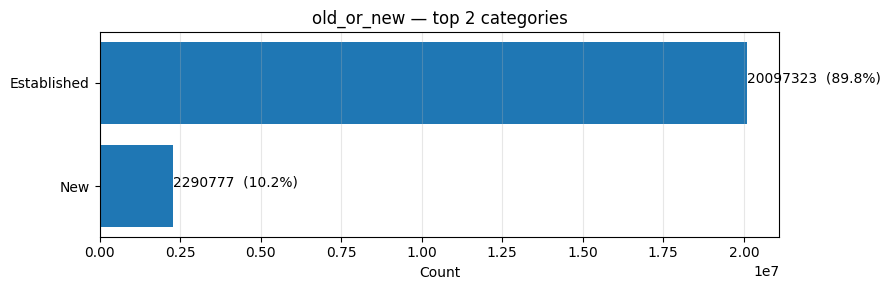

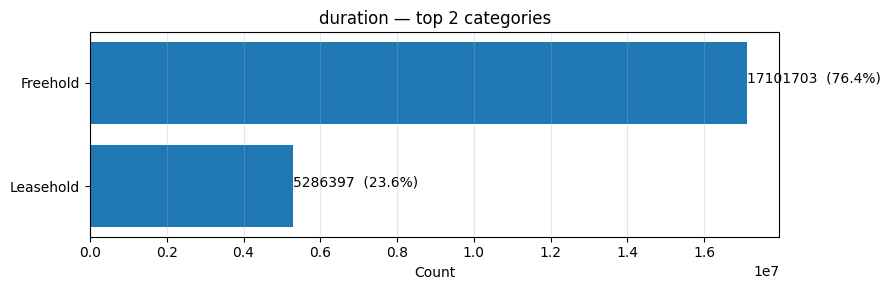

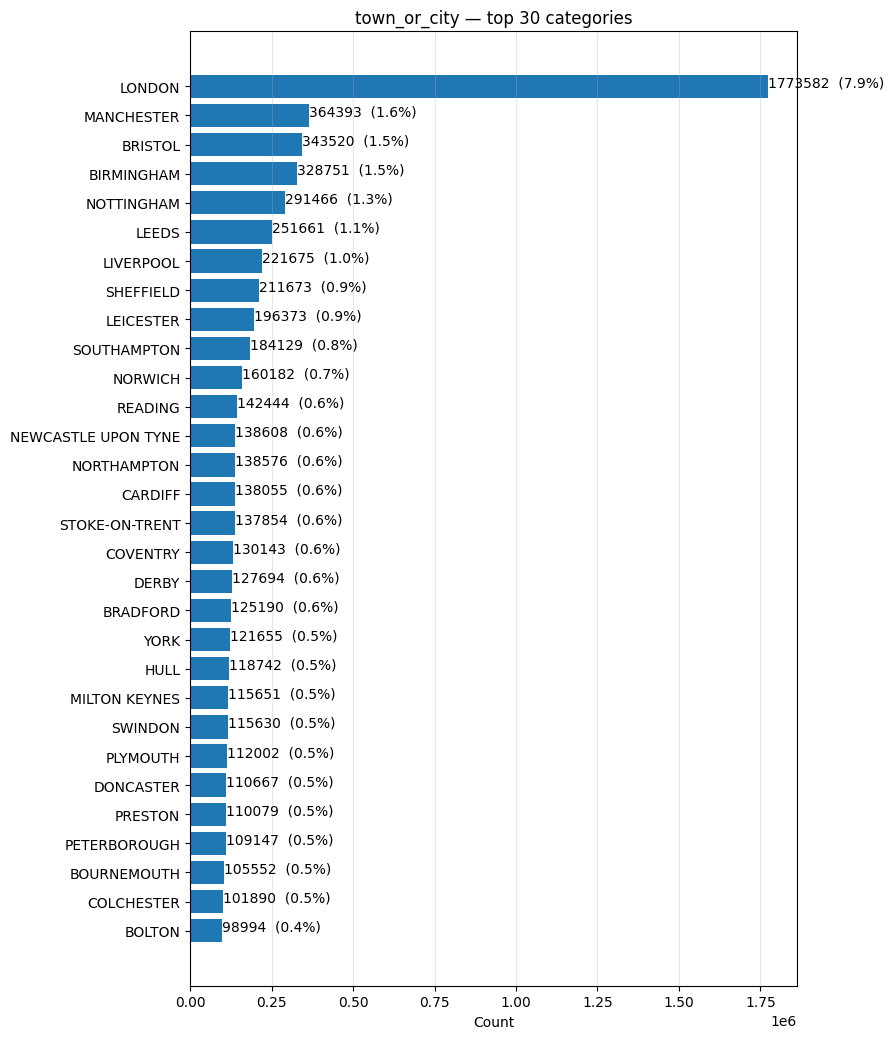

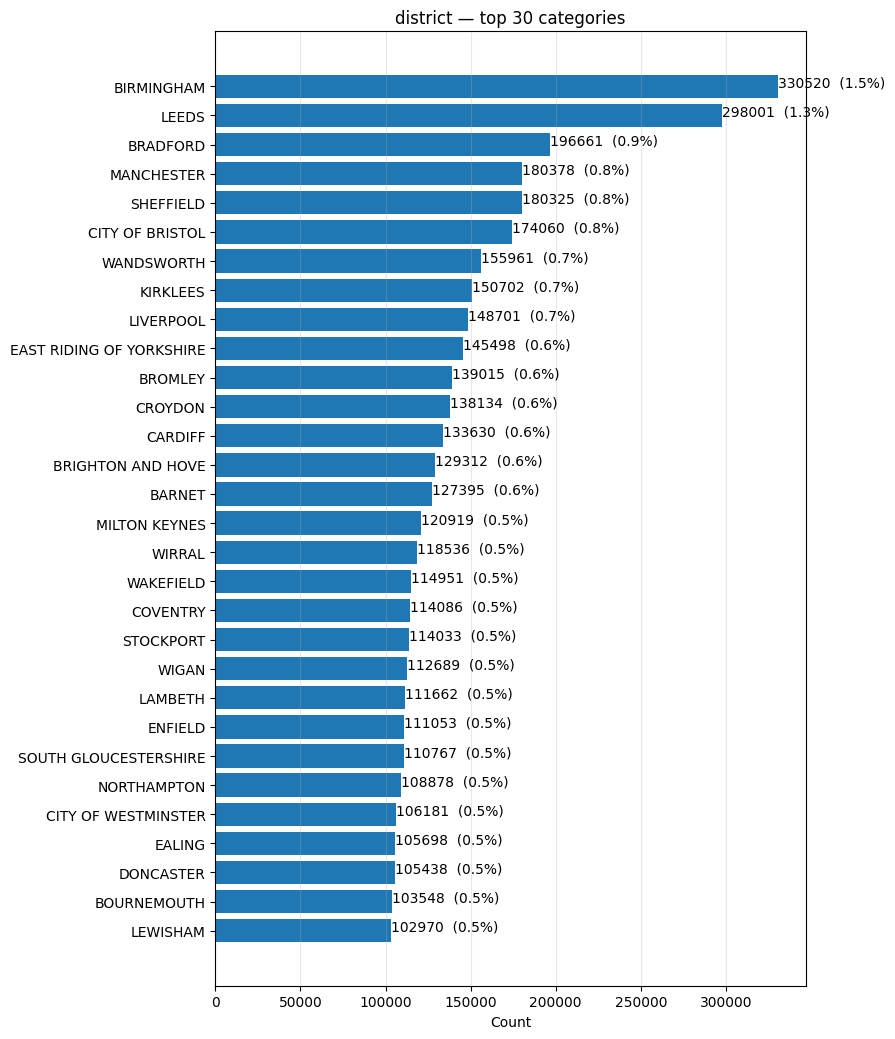

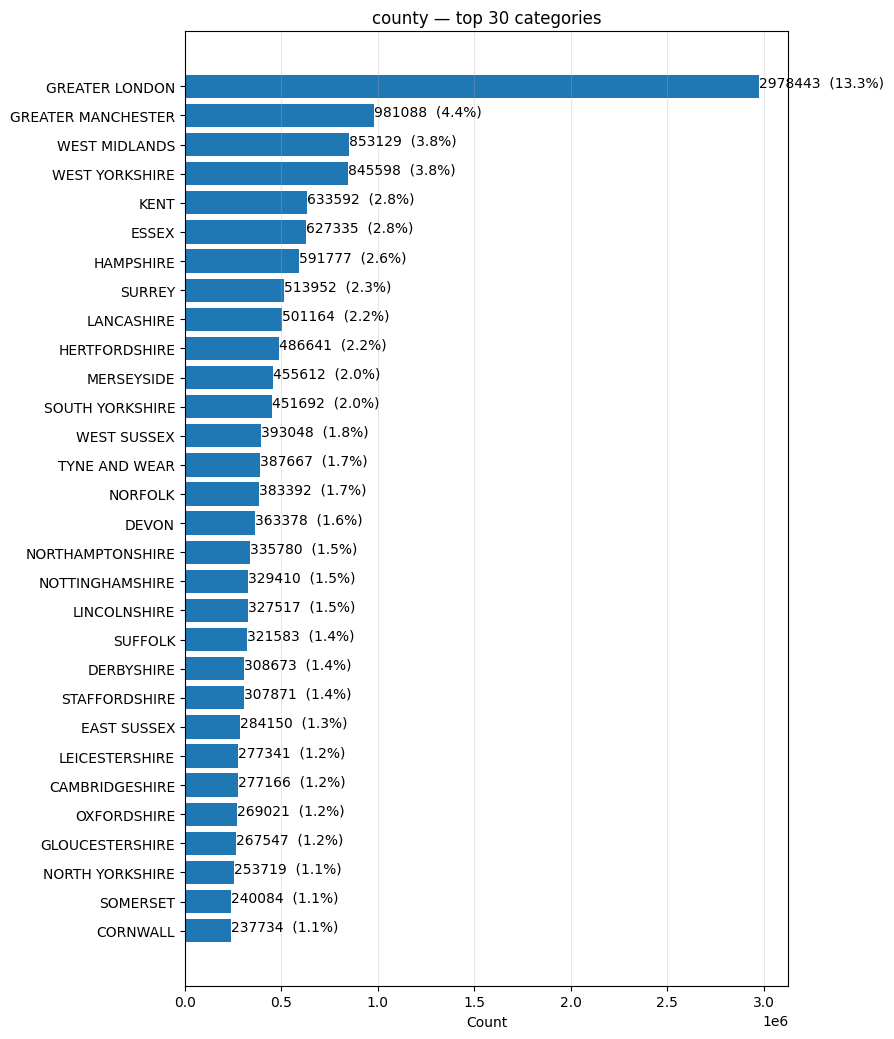

In [54]:
for column in df.columns:
    if column in numerical_columns:
        plot_numeric(column)
    elif column in label_columns:
        plot_categorical(column)
    elif column in date_columns:
        plot_date(column)
# Full file: 1m24

In [ ]:
df.to_csv("cleaned_" + input_file, index=False)
df.to_csv("cleaned_encoded_" + input_file, index=False)
# Full file: 2m28